<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de Procesos Financieros. 

**Nombres:** Ana Sofia Durrmuller Acosta y Gerardo González Flores

**Fecha:** 8 de octubre del 2021.

**Expediente** : if723489 if721430

**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anadurrmuller/Tarea6_ASDurrmuller_GGonzalez.git 

# Tarea 6

Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)


5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados. El resultado debe de ser como sigue:
![imagen.png](attachment:imagen.png)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

8. Demostrar la validez de la siguiente ecuación
$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

9. Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    

Demuestre matemáticamente que 
 $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
 y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

### Respuestas Estudiante 1. Ana Sofia

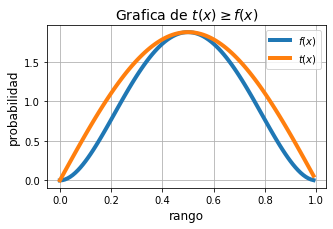

In [2]:
# Solucion 1
x =np.arange(0,1,0.01)

#Funcion
f = lambda x: 30*((x**2)-(2*x**3)+(x**4)) 

#Encontrar el maximo de la funcion
c = float(f(optimize.fmin(lambda x:-f(x), 0, disp=False))) 
t = lambda x: c * np.sin((np.pi)*x) 
plt.figure(figsize=[5,3]) 
plt.title('Grafica de $t(x)\geq f(x)$',fontsize=14)
plt.xlabel('rango',fontsize=12)
plt.ylabel('probabilidad',fontsize=12)
plt.plot(x,f(x), label='$f(x)$',lw=4)
plt.plot(x,t(x),label='$t(x)$',lw=4)
plt.grid()
plt.legend();
plt.show()

#### Solucion 2
Sabemos que:
$$g(x)=\frac{f(x)}{c}$$

$$ c=\int_{0}^{1} t(x)  dx$$
Sustituimos $t(x)$:
$$c= \int_{0}^{1} a \sin(\pi x) dx$$
Definimos nuestra $c$:
$$c= \frac{2a}{\pi} $$
Sustituimos:
$$g(x) =  \frac{a \sin(\pi x)}{\frac{2a}{\pi}}$$$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$

#### Solucion 3
$$ g(x) = \frac{ \pi \sin(\pi x)}{2} $$
Por definición:
$$G(x) = \int g(x)dx $$$$ G(x) =  \int_{0}^{x} \frac{ \pi \sin(\pi x)}{2} dx$$
Definimos:
$$ U = \frac{1}{2}(- \cos(\pi x)+1) $$
Resolvemos:
$$ 2U = (- \cos(\pi x)+1) $$$$ 2U - 1 = - \cos(\pi x) $$$$ \cos^{-1}(-2U+1) = \pi x$$
Obtenemos:
$$x= \frac{\arccos(1 - 2U)}{\pi}$$

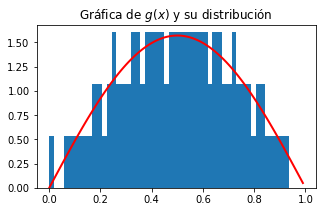

In [6]:
# Solucion 4
N = 10000
x = np.arange(0,1,0.01) #vector x que va de 0 a 1
gx = lambda x: (np.pi * np.sin(np.pi*x))/2 #funcion g(x)
distribucion_gx = lambda u: (np.arccos(1-2*u))/np.pi #distribucion de g(x)
val_aleatorios = np.random.rand(N) # genera valores aleatorios 
#grafica
plt.figure(figsize=[5,3]) 
plt.title('Gráfica de $g(x)$ y su distribución',fontsize=12)
plt.plot(x,gx(x),'-r',lw=2)
plt.hist(distribucion_gx(x),bins=50,density=True);

In [7]:
# Solucion 5
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'om') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'oc') 
     for i in range(len(R1))]
                
    plt.show()
    
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

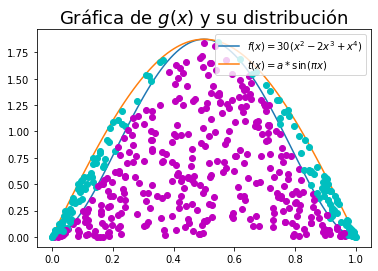

In [8]:
#grafica
plt.figure(figsize=[6,4])
plt.title('Gráfica de $g(x)$ y su distribución',fontsize=18) 
f = lambda x: 30*(x**2 - 2*x**3 + x**4)  
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False)) 
t = lambda x: a * np.sin(np.pi*x) 
plt.plot(x,f(x), label='$f(x)=30(x^2-2x^3+x^4)$') 
plt.plot(x,t(x),label='$t(x)=a *\sin(\pi x)$')
plt.legend(loc="best")


N = 500 
R2 = np.random.rand(N) 
R1 = np.random.uniform(0,1, size=N)
x_s = Acep_rechazo(R2,R1,f,t)

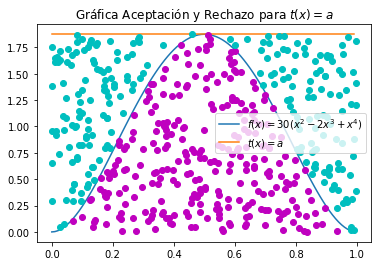

El número de elementos aceptados para la función de pulso senoidal es 0.672
El número de elementos aceptados para la función constante es 0.554


In [9]:
# Solucion 6
#grafica
plt.figure(figsize=[6,4])
plt.title('Gráfica Aceptación y Rechazo para $t(x)=a$',fontsize=12)
plt.plot(x,f(x), label='$f(x)=30(x^2-2x^3+x^4)$')
t = lambda x: a*np.ones([len(x)]) 
plt.plot(x,t(x),label='$t(x)=a$') 
plt.legend(loc="best");

# Validación del método
N = 500 
R2 = np.random.rand(N)
R1 = np.random.uniform(0,1, size=N)
x_a = Acep_rechazo(R2,R1,f,t)


#Respuestas
print(f'El número de elementos aceptados para la función de pulso senoidal es {len(x_s)/N}')
print(f'El número de elementos aceptados para la función constante es {len(x_a)/N}')

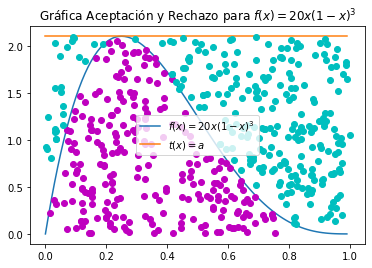

In [10]:
# Solucion 7

#se generan los puntos de aceptación rechachazo para f(x) como constante
plt.figure(figsize=[6,4])
plt.title('Gráfica Aceptación y Rechazo para $f(x)=20x(1-x)^3$',fontsize=12)
f = lambda x: 20*x*(1-x)**3
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
t = lambda x: a*np.ones([len(x)])

#grafica
plt.plot(x,f(x), label='$f(x)=20x(1-x)^3$')
plt.plot(x,t(x),label='$t(x)=a$')
plt.legend(loc="best");

# validación del método
N = 500 #numero de simulaciones

R2 = np.random.rand(N)
R1 = np.random.uniform(0,1, size=N)
V_A = Acep_rechazo(R2,R1,f,t)

#### Solución 8
Despejando queda asi: $$\frac{p_{i+1}}{p_i}=\frac{n-i}{i+1}\frac{p}{1-p} $$ Sustituimos: $$\frac{(n+1)!}{n!}=n+1 ; \frac{n!}{(n+1)!}=\frac{1}{n+1}$$ se tiene que:$$ (n-1)! = \frac{n!}{n} ; n!=n(1+n)!$$ $$ \frac{p_{i+1}}{p_i}=\frac{\frac{n! p ^ {i+1} (1-p)^{n-i+1}}{(i+1)!(n-i+1)!}}{\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}}$$ 
$$p_{i+1} = \frac{p(n-i)!(-p+i)(i+1)^{n+1-i}}{(i+1)(n+1-i)(-p+1)^{n-i}}p_i$$$$p_{i+1} = \frac{n-i}{i+1}\frac{p}{1-p}p_i$$

#### Solución 9
Metemos la función de distribución en la solución:
$$P(k+1, \lambda) = \frac{e^{-\lambda}\lambda^{k+1}}{(k+1)!}$$
Sabemos que $x^{k+1} = x^kx^1$
$$P(k+1, \lambda) = \frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)!}$$
Sabemos que $x! = x(x-1)!$
$$P(k+1, \lambda) = \frac{e^{-\lambda}\lambda^{k}\lambda}{(k+1)k!}$$
Tenemos la igualdad $P(k) = \frac {e^{-\lambda}\lambda^k}{k!}$
$$P(k+1) = \frac{\lambda P(k)}{( k + 1)}$$

In [11]:
def Gen_distr_discreta(X:'vector de números aleatorios',
                       prob_acumulada: 'de la distribución a generar'):
    v = np.array(list(map(lambda j:sum(1 for i in prob_acumulada if i<X[j]),range(N))))
    return v

def plot_histogram_discrete(dist:'señal de varibles aleatorias',
                            label,
                            den=True):
    plt.figure(figsize=[8,6])
    y,x = np.histogram(dist,bins = len(set(dist)),density = den) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()
    
def P_acum_Binomial(n,p):
    Pr = np.zeros(n) #vector 
    Pr[0] = (1-p)**n 
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Comprensión de listas 
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

In [12]:
def P_acum_Poisson(t: 'Media o la tasa de ocurrencia',
                   k: 'Número de ocurrencias'):
    Pr = np.zeros(k)
    Pr[0] =np.exp(-l)
    def pr(i):
        nonlocal Pr
        Pr[i+1]=(l*Pr[i])/(i+1)
        
    [pr(i) for i in range(k-1)]
    return np.cumsum(Pr)

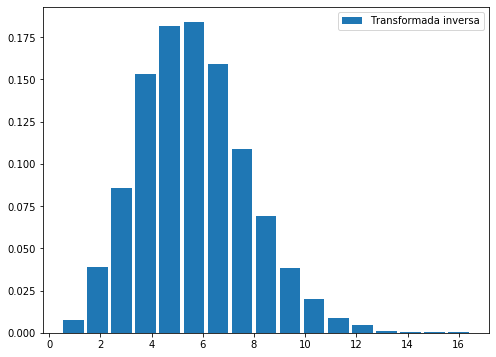

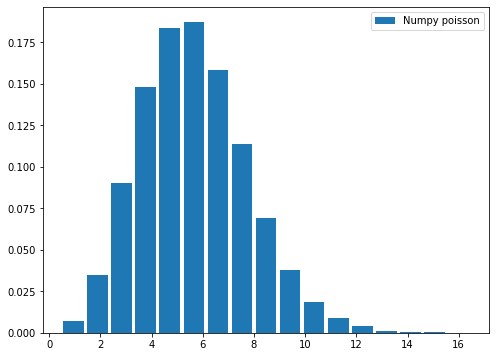

In [13]:
l=5 ; k = 1000; N = 10000

p_acum_p = P_acum_Poisson(l,k)
u = np.random.rand(N)


d_poisson = Gen_distr_discreta(u,p_acum_p)
plot_histogram_discrete(d_poisson,'Transformada inversa') # metodo

d_poisson_numpy = np.random.poisson(l,N)
plot_histogram_discrete(d_poisson_numpy,'Numpy poisson') #numpy

### Respuestas Estudiante 2. Gerardo

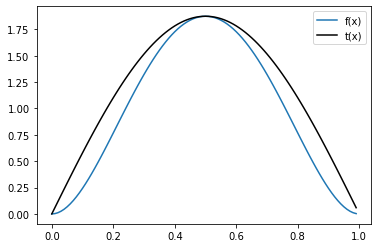

In [14]:
# Solucion 1
# Función objetivo 
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))

# Función t -> Función constante
t = lambda x: max_f * np.sin(np.pi*x)

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)',color='k')
plt.legend()

### Solucion 2

Obtener el valor de c:$$c = \int_{0}^{1}t(x)dx = \int_{0}^{1} asin(\pi x) dx = \frac{-a}{\pi}[cos(\pi x)]_{0}^{1} = \frac{2a}{\pi}$$

Sustituir C para obtener $g(x)$:$$g(x) = \frac{t(x)}{c} = \frac{\frac{asin(\pi x)}{1}}{\frac{2a}{\pi}} = \frac{\pi sin(\pi x)}{2} $$

### Solucion 3
1* Integramos $g(x)$ para obtener $G(x)$:$$G(x) = \int_{0}^{x}g(x) = \int_{0}^{x}\frac{\pi}{2}sin(\pi x) = -\frac{1}{2}[cos(\pi x)]_{0}^{x}$$$$ G(x) = -\frac{1}{2}cos(\pi x) + \frac{1}{2}$$

2* Método de la transformada inversa:$$ G(x) = -\frac{1}{2}cos(\pi x) + \frac{1}{2}$$$$ U = -\frac{1}{2}cos(\pi x) + \frac{1}{2}$$$$ -2U + 1 = cos(\pi x) $$$$ x = \frac{cos^{-1}(-2U +1)}{\pi}$$

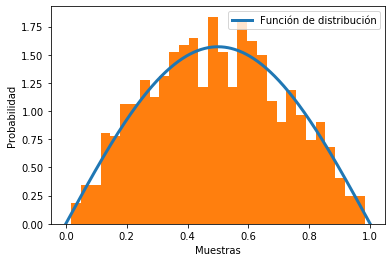

In [15]:
# Solucion 4

gx = lambda x: (np.pi/2)*(np.sin(np.pi*x)) #densidad
Gu = lambda u: ((np.arccos(2*(1/2-u)))/np.pi) # Transformada inversa

def comparador(f: 'Función de Densidad de Probabilidad',F: 'Función Inversa',N:'Número de simulaciones a realizar'):
    '''
    Comparador entre una función de Densidad de Probabilidad (f) y una función Inversa, a través de graficar la FDP y
    el histograma de la Función inversa una N cantidad de veces. Genera un espacio uniforme que le va a pasar a la función
    inversa, y un linspace para graficar la FDP.
    '''
    x = np.linspace(0,1,N)
    u = np.random.uniform(0,1,N)
    plt.plot(x, f(x),lw = 3,  label = 'Función de distribución')
    plt.hist(F(u), bins = 30, density = True);
    plt.ylabel('Probabilidad')
    plt.xlabel('Muestras')
    plt.legend()
    plt.show()
comparador(gx,Gu,1000)

In [16]:
# Solucion 5
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):

    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]            
    
    plt.xlabel("Valores aleatorios")
    plt.ylabel("Probabilidad")
    plt.title("Método de aceptación y rechazo")
    
    plt.show()
    x = [R1[i] for i in range(len(R1)) if condition[i]]
    return x

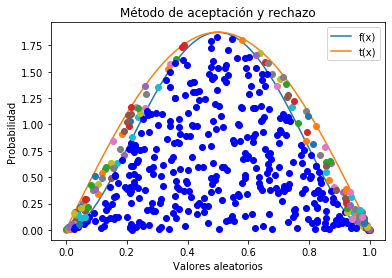

In [17]:
# Función objetivo 
f = lambda x: 30 * (x**2 - 2 * x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función pulso senoidal 
t = lambda x: max_f * np.sin(np.pi*x)

# Rango donde se graficará las funciones
N=500
x = np.arange(0, 1, 1/N)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N= 500 # número de puntos a simular

R2 = np.random.rand(N)  # valores aleatorios uniformes
R1 = np.random.uniform(0, 1, size=N) # valores aleatorios uniformes


# Prueba de función creada
x_r = Acep_rechazo(R1, R2, f, t)

La gráfica muestra que los puntos dentro de la función de densidad (puntos azules) son aceptados, y los demas puntos que se encuentran entre la $t(x)$ y $f(x)$ son los rechazados.

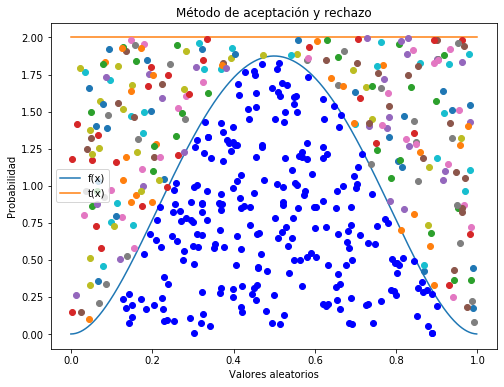

In [18]:
# Solucion 6

tc = lambda x : 2*np.ones(len(x))
R1 = np.random.uniform(0,1,500)
R2 = np.random.uniform(0,1,500)

plt.figure(figsize= (8,6))
plt.plot(x,f(x),label='f(x)')
plt.plot(x,tc(x),label='t(x)')
plt.legend()
plt.title('Método de aceptación-rechazo con tx constante')
aprobc = Acep_rechazo(R2,R1,f,tc)
plt.show()

In [19]:
#Función constante
prob_c = len(aprobc)/500
#Pulso senoidal 
prob_ps = len(x_r)/500

prob_c, prob_ps

(0.492, 0.694)

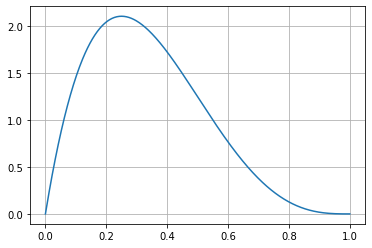

In [20]:
# Solucion 7

#Creando función
fx = lambda x: 20*x*(1-x)**3
#Graficando para aproximar una t constante
x = np.linspace(0,1,500)
plt.plot(x,fx(x))
plt.grid()

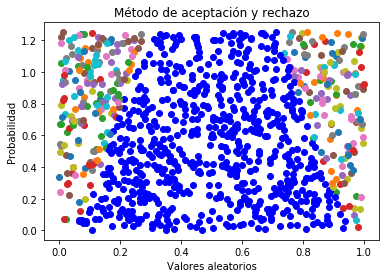

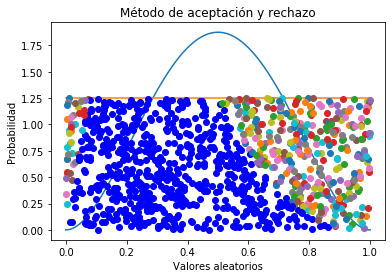

In [21]:
# Máximo de la función f
max_f = fx(optimize.fmin(lambda x:-f(x), 0, disp=False))

t = lambda x : max_f*np.ones(len(x))
#Usando la función´metodo_aceptacion_rechazo
R1 = np.random.uniform(0,1,1000)
R2 = np.random.uniform(0,1,1000)
Acep_rechazo(R1,R2,f,t);

plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')

#Se puede utilizar la función anterior para crear las variables aleatorias.
VA = Acep_rechazo(R1,R2,fx,t)

### Solución 8
1°Se divide $\frac{p_{i+1}}{p_i}$, y obtenemos un cociente, que podemos lograr simplificar con la propiedad del factorial que establece que $\frac{n!}{(n+1)!} = \frac{1}{n+1}$.

2°Por lo tanto: $\frac{p_{i+1}}{p_i} = \frac{n!p^ip(1-p)^ni!(n-i)!(1-p)^i}{(1-p)^i(1-p)(i+1)!(n-i+1)!n!p^i(1-p)^n}$

Al simplificar: $\frac{p_{i+1}}{p_i} =\frac{(n-i)p}{(i+1)(1-p)}$

Finalmente:$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i$$

### Solución 9 
Demostración
Se toma en cuenta la propiedad: $\frac{k!}{(k+1)!} = \frac{1}{k+1}$ por lo tanto:$$\frac{P(k+1)}{P(k)} = \frac{e^{-\lambda}\lambda^k\lambda k!}{(k+1)!e^{-\lambda}\lambda^k} = \frac{\lambda k!}{(k+1)!} = \frac{\lambda}{1+k}$$

$$P(k+1) = \frac{\lambda}{k+1}P(k)$$
Procedimiento

Mediante la fórmula obtenida:
$$P(k+1) = \frac{\lambda}{k+1}P(k)$$se genera una función para calcular la probabilidad acumulada
Se genera una distribución en base a esa probabilidad acumulada, y en base a valores reales aleatorios.
Para concluir se grafica el histograma de esta distribución de Poisson y se compara con la distribución de Poisson generada con numpy.random.poisson()

In [22]:
#Solución 9 


def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)

    plt.legend()
    plt.show()

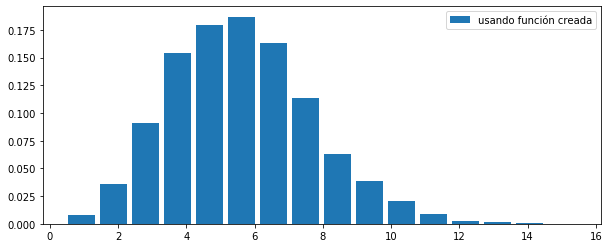

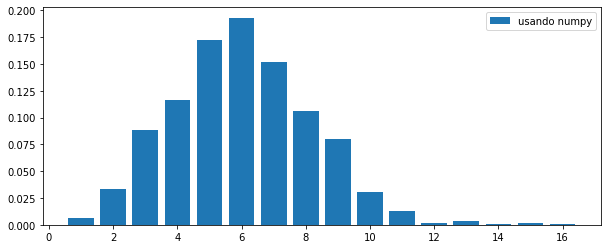

In [23]:

np.random.seed(123) #semilla

def poisson_acum(l: 'valor de lambda', k: 'número de términos'):
    '''
    Función que calcula la probabilidad acumulada
    '''
    poisson = np.zeros(k) # vector de k ceros
    poisson[0] = (np.exp(-l)) # primer elemento del vector
    
    def vector(i):
        nonlocal poisson
        poisson[i+1] = (l*poisson[i])/(i + 1)
        
    [vector(i) for i in range(k-1)] # Llenar vector 
    return poisson.cumsum()  #retornar la suma acumulada

N, l, k = 10000, 5, 1000 # parametros 
p_acum = poisson_acum(l,k)

# Usando el método de la transformada inversa
d_poisson = Gen_distr_discreta(p_acum,np.arange(0, k+1), N)
plot_histogram_discrete(d_poisson,'usando función creada')

# Usando numpy
d_poisson_n = np.random.poisson(l,k)
plot_histogram_discrete(d_poisson_n,'usando numpy')